##K Means 

###Data preprocessing 

###Clustering 

###Elbow method  

####Silhouette score

#####Importing libraries 

In [5]:
#Loading the required modules
 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

###loading dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ML_data/toy_dataset.csv')

In [7]:
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [8]:
df.shape

(150000, 6)

###Info of dataset (Details)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


###Converting data from categorial to numeric (Integers)


In [10]:
df.dtypes
#df.isnull().sum()

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [11]:
# Conversion of data that alogorithm can perform 

df["Gender"] = df["Gender"].astype('category')
df["City"] = df["City"].astype('category')
df["Illness"] = df["Illness"].astype('category')
df["Income"] = df["Income"].astype('int')
df.dtypes


Number        int64
City       category
Gender     category
Age           int64
Income        int64
Illness    category
dtype: object

In [12]:
df["Gender"] = df["Gender"].cat.codes
df["City"] = df["City"].cat.codes
df["Illness"] = df["Illness"].cat.codes


####Now have a look at dataset

In [13]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,2,1,41,40367,0
1,2,2,1,54,45084,0
2,3,2,1,42,52483,0
3,4,2,1,40,40941,0
4,5,2,1,46,50289,0


In [14]:
# Have a look at datatypes again to check all are integers
df.dtypes

Number     int64
City        int8
Gender      int8
Age        int64
Income     int64
Illness     int8
dtype: object

In [15]:
# Droping column which are not of any use

df.drop('Number',
   axis='columns', inplace=True)


df.head()

,City,Gender,Age,Income,Illness
0,2,1,41,40367,0
1,2,1,54,45084,0
2,2,1,42,52483,0
3,2,1,40,40941,0
4,2,1,46,50289,0


In [16]:
df.describe()

,City,Gender,Age,Income,Illness
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.591807,0.558667,44.950200,91252.798273,0.080927
std,1.826295,0.496548,11.572486,24989.500948,0.272723
min,0.000000,0.000000,25.000000,-654.000000,0.000000
25%,2.000000,0.000000,35.000000,80867.750000,0.000000
50%,4.000000,1.000000,45.000000,93655.000000,0.000000
75%,5.000000,1.000000,55.000000,104519.000000,0.000000
max,7.000000,1.000000,65.000000,177157.000000,1.000000


##K Means

In [17]:
X = df.iloc[:,[0,1,2,3,4]].values

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =600, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  
  
print(X)

#sns.scatterplot(Z[0],Z[1],hue=label,palette=’inferno_r’)

[[     2      1     41  40367      0]
 [     2      1     54  45084      0]
 [     2      1     42  52483      0]
 ...
 [     0      1     26 111885      0]
 [     0      1     25 111878      0]
 [     0      0     37  87251      0]]


In [18]:
KMean= KMeans(n_clusters=5)
KMean.fit(df)
label=KMean.predict(df)

##silhouette score to check accuracy of Clustering 

In [19]:
#Accuracy is low because of dataset we have :) Use your own datasets Like iris or others

print(f'Silhouette Score(n=5): {silhouette_score(X, label)}')

Silhouette Score(n=5): 0.5401212852881909


###Visualization

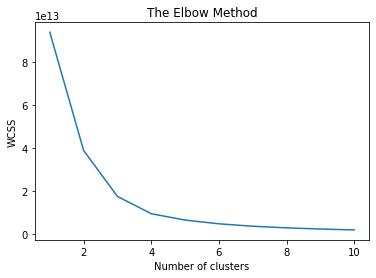

In [20]:
# Graph to visualize the Elbow Method to find the optimal number of cluster  

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

####PCA for dimensionaliy reduction to plot datapoints in 2D graph

In [21]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

print(X)

[[ 5.08857983e+04 -3.98132026e+00]
 [ 4.61687983e+04  9.02156587e+00]
 [ 3.87697983e+04 -2.97390658e+00]
 ...
 [-2.06322017e+04 -1.89374531e+01]
 [-2.06252017e+04 -1.99374574e+01]
 [ 4.00179833e+03 -7.95238085e+00]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

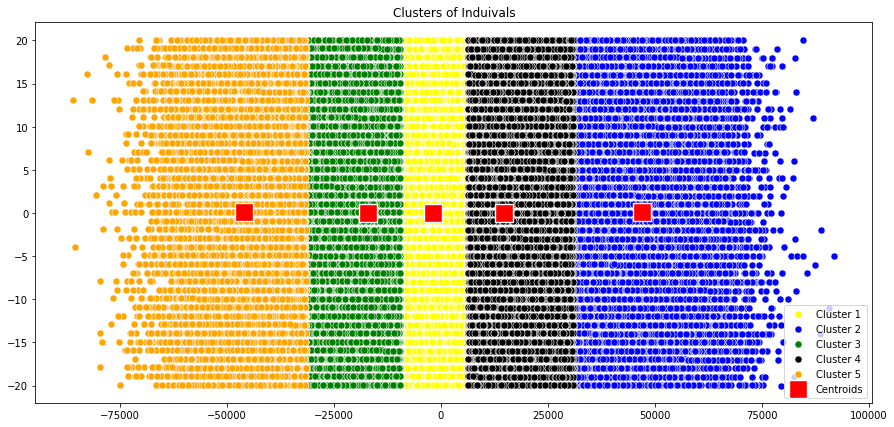

In [22]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 600, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

plt.figure(figsize=(15,7))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'black', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Induivals')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()
